<a href="https://colab.research.google.com/github/milioe/Moravec/blob/main/1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Regression with Neural Networks

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

* Hyperparameter - something that we change or state
* Parameter - something that our neural network learns

In [ ]:
import tensorflow as tf

## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0])

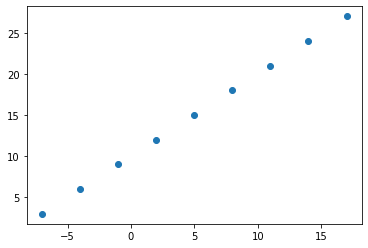

In [ ]:
plt.scatter(X, y);

## Exploratory Analysis (EDA)

In [ ]:
# Take a single example X 
input_shape = X[0].shape
input_shape

output_shape = y[0].shape
output_shape

()

In [ ]:
X[0], y[0]

(-7.0, 3.0)

# First neural Network

In [ ]:
# 1. Set random seed
tf.random.set_seed(42)

# 2. Create a model using Sequential
model = tf.keras.Sequential([                     
  tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) # metrics ≠ loss

# 4. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 12.1497 - mae: 12.1497
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.8897 - mae: 11.8897
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.6297 - mae: 11.6297
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.3697 - mae: 11.3697
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 11.1097 - mae: 11.1097


🔑 **Note**: All regression metrics must be minimum.

In [ ]:
# Make a prediction with model
model.predict([20.0])

array([[16.451199]], dtype=float32)

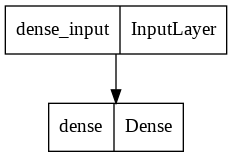

In [ ]:
tf.keras.utils.plot_model(model)

# How to improve a model

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)

In [ ]:
#0. Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as above)
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model2.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 343ms/step - loss: 12.1497 - mae: 12.1497
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8897 - mae: 11.8897
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6297 - mae: 11.6297
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3697 - mae: 11.3697
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1097 - mae: 11.1097
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8497 - mae: 10.8497
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5897 - mae: 10.5897
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3297 - mae: 10.3297
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0697 - mae: 10.0697
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8097 - mae: 9.8097
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
model2.predict([20.0])

array([[33.803394]], dtype=float32)

## Evaluating the model

Visualize, Visualize, Visualize

* **The Data**: what data are you working with
* **The model itself**: What about the architecture
* **The training of a model**: How does the model perfom?
* **The prediciton of a model**: How do the predictions of a model line up against the ground truth

In [ ]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

$y = X+10$

## Split data into training / test set

* **Training set**: the model learns from data, which is typically 70-80%
* **Validation set**: the model gets tuned with this data
* **Test set**: the model get evaluated from this.

In [ ]:
len(X)

50

In [ ]:
len(y)

50

In [ ]:
# Split data into train & test
X_train = X[:40]
X_train

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56])

In [ ]:
X_test = X[40:]
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [ ]:
y_train = y[:40]
y_train

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])

In [ ]:
y_test = y[40:]
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Visualizing the data

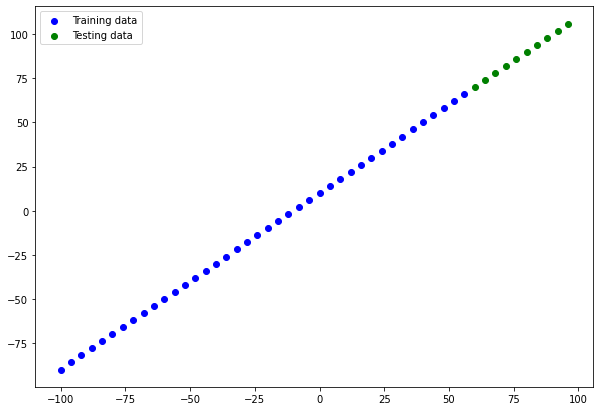

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Testing data")
plt.legend();

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create the model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model3.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 10ms/step 

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


🔑 **Note**: 
* **Total params**: total number of params
* **Trainable params**: *patterns* that the model can update as it trains
* **Non-Trainable params**: Params from a pretrained model

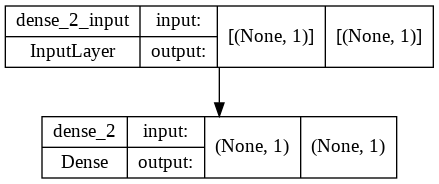

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
# Make predictions
y_preds = model3.predict(X_test)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_preds):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();


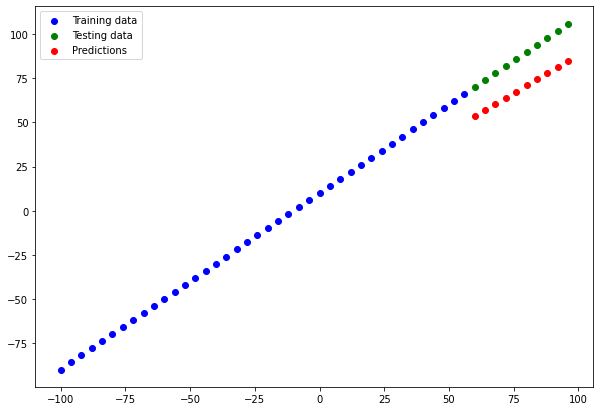

In [ ]:
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_preds)

## Evaluating predictions

* Mean Absolute error (MAE)
* Mean Squared Error (MSE)

In [ ]:
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
# Note the difference in shape
y_test.shape

(10,)

In [ ]:
y_preds.shape

(10, 1)

In [ ]:
y_preds_2 = y_preds.squeeze()

In [ ]:
y_preds_2.shape

(10,)

In [ ]:
y_preds_2

1

In [ ]:
# Calculate MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())

In [ ]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
# Calculate MSE
mse = tf.metrics.mean_squared_error(y_test,
                                    y_preds.squeeze())

In [ ]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.5734>

## Model_4

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),
])

# 2. Compile model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
y_preds_4 = model_4.predict(X_test)

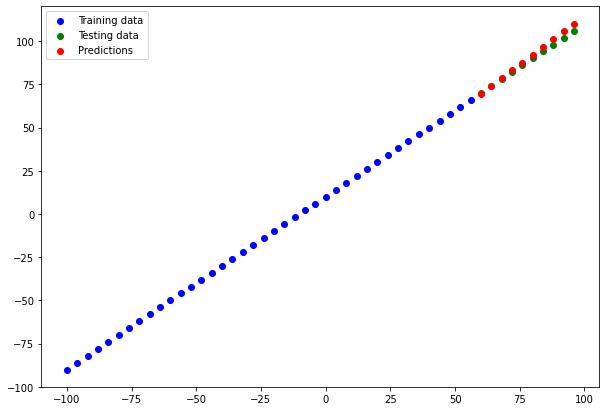

In [ ]:
plot_prediction(predictions=y_preds_4)

## model_5

In [ ]:
#0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [ ]:
y_preds_5 = model_5.predict(X_test)

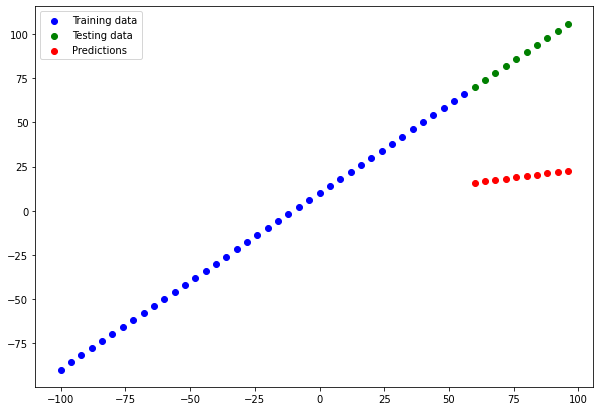

In [ ]:
plot_prediction(predictions=y_preds_5)

## Evaluate model

In [ ]:
mae_1 = tf.metrics.mean_squared_error(y_test, y_preds.squeeze()).numpy()
mae_2 = tf.metrics.mean_squared_error(y_test, y_preds_2.squeeze()).numpy()
mae_4 = tf.metrics.mean_squared_error(y_test, y_preds_4.squeeze()).numpy()
mae_5 = tf.metrics.mean_squared_error(y_test, y_preds_5.squeeze()).numpy()

In [ ]:
model_results = [["model_2", mae_1],
                 ["model_2", mae_2],
                 ["model_4", mae_4],
                 ["model_5", mae_5]]

In [ ]:
import pandas as pd
results = pd.DataFrame(model_results, columns=["model", "Mae"])

In [ ]:
results

,model,Mae
0,model_2,353.573395
1,model_2,353.573395
2,model_4,5.459025
3,model_5,4804.473145


## Save a model

In [ ]:
# Forma 1
model_4.save("best_model")

INFO:tensorflow:Assets written to: best_model/assets


In [ ]:
# forma 2
model_4.save("best_super_model.h5")

## Load model

In [ ]:
loaded = tf.keras.models.load_model("best_model")

In [ ]:
loaded.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds = loaded.predict([27])

In [ ]:
preds

array([[32.189686]], dtype=float32)